# Coding Tutorial 5 - PyTorch Datasets and GPU

```
Course: CSCI 5922 Spring 2025, University of Colorado Boulder
TA: Everley Tseng
Email: Yu-Yun.Tseng@colorado.edu
* AI assistant is used in making this tutorial
```


## Overview

Sections:
- Dataset loading: built-in vs. home-made
- CPU vs. GPU
- CSCI 5922 computing resources

Objectives:
- Learn how to load datasets from difference source
- Understand the computing speed of CPU and GPU
- Learn to leverage the course GPU computing resources



## Datasets

### PyTorch Built-in Datasets

PyTorch has built-in datasets, and they are commonly open-sourced datasets created and publicly shared by vision, language, and other AI communities. The benefits of using built-in datasets include:
- Easy Access: No need to manually download and preprocess datasets.
- Standardized Format: Datasets are structured as `torch.utils.data.Dataset objects`, making them compatible with PyTorch's DataLoader.
- Automatic Downloading: Many datasets can be downloaded automatically with the flag `(download=True)`.

While the built-ins are easy to call, it is recommended that you find the original source of the datasets to learn more about them (e.g., their limitations from how they were created). Recall, we already used the MNIST dataset in an earlier tutorial to test different CNN models. You can find more datasets in the following libraries:

- Vision: `torchvision.datasets` ([available datasets](https://pytorch.org/vision/stable/datasets.html))
- Audio and Speech: `torchaudio.datasets` ([available datasets](https://pytorch.org/audio/2.5.0/datasets.html))

Below, we will practice loading some image datasets from `torchvision.datasets`.

In [1]:
import torch
import torchvision
from torchvision.transforms import v2
import matplotlib.pyplot as plt

To read image data, we need to consider the following:
- Shape of the images: This will tell us the input channel size (e.g., grayscale image, RGB color image.) and the resolution of the images.
- Labels: This determines the output layer, such as knowing the know the number of **categories** in a classification dataset to know the number of nodes that should be in the last layer.

We will now practice loading two image datasets and see what the data look like.

#### Example 1: MNIST

- Pytorch link to [MNIST](https://pytorch.org/vision/main/generated/torchvision.datasets.MNIST.html)
- More detailed description of the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database)

Dataset size: 60000
Image size: torch.Size([28, 28])
Categaries: 10


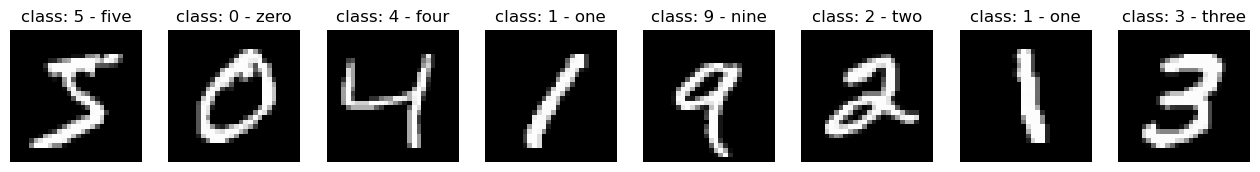

In [2]:
mnist_data = torchvision.datasets.MNIST(root='./data', transform=v2.Compose([v2.ToImage(),]), download=True)

# Stack images and labels
images = mnist_data.data
labels = mnist_data.targets
class_names = mnist_data.classes
print('Dataset size: {}'.format(len(images)))
print('Image size: {}'.format(images[0].shape))
print('Categaries: {}'.format(len(class_names)))

# Plot samples
fig, axs = plt.subplots(1, 8, figsize=(16, 2))
for i in range(8):
    axs[i].imshow(images[i], cmap='gray')
    axs[i].set_title(f"class: {class_names[labels[i]]}")
    axs[i].axis('off')
plt.show()

#### Example 2: CIFAR-100

- PyTorch link to [CIFAR100](https://pytorch.org/vision/main/generated/torchvision.datasets.CIFAR100.html)
- More detailed description of the [CIFAR100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html)

100%|██████████| 169M/169M [00:06<00:00, 27.7MB/s] 


Dataset size: 50000
Image size: (32, 32, 3)
Categaries: 100


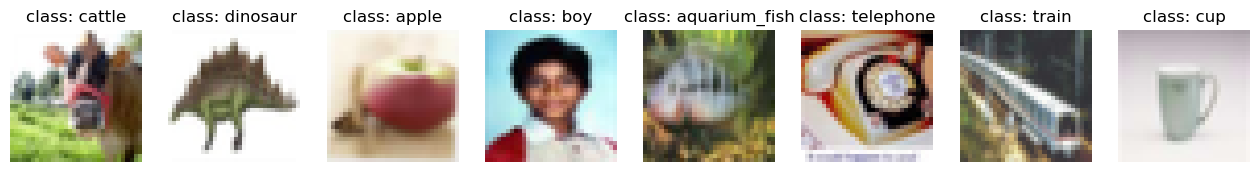

In [3]:
cifar100_data = torchvision.datasets.CIFAR100(root='./data', transform=v2.Compose([v2.ToImage(),]), download=True)

# Stack images and labels
images = cifar100_data.data
labels = cifar100_data.targets
class_names = cifar100_data.classes
print('Dataset size: {}'.format(len(images)))
print('Image size: {}'.format(images[0].shape))
print('Categaries: {}'.format(len(class_names)))

# Plot samples
fig, axs = plt.subplots(1, 8, figsize=(16, 2))
for i in range(8):
    axs[i].imshow(images[i])
    axs[i].set_title(f"class: {class_names[labels[i]]}")
    axs[i].axis('off')
plt.show()

### External Dataset

For comparison, let's load a small external dataset. Download the zip file here:
https://drive.google.com/file/d/18U4pjNTxFOndQTYiwbMcHfkvnyIVTBWO/view?usp=sharing

You will need to upload the unzipped dataset to your Google Drive for the path in the following cell. Please change the path to `/content/drive/My Drive/your_dataset_path`.

In [4]:
dataset_path = "./data/dataset"

To load the dataset, we need to manually read the files. From the unzipped folder, we see the following data available:
- `images`
- `image_labels.json`

For open-source datasets, you can read their website for annotation structures. For your home-made dataset, you are able to come up with your own annotation structure. For instance, this dataset is structured in the following format:
```
<image_id>: {'file_name': <file_name>, 'label': <label>, 'class_name': <class_name>}
```

From the given data, we'll try to print/plot the same information. To do so, you need more libraries imported:
- `os`: for reading from local directory
- `json`, `plk`, or other data format: for reading the annotation file(s)
- `PIL.Image` or `cv2`: for reading images from a local path

Dataset size: 100
Image size: torch.Size([224, 224, 3])
Categories: 10


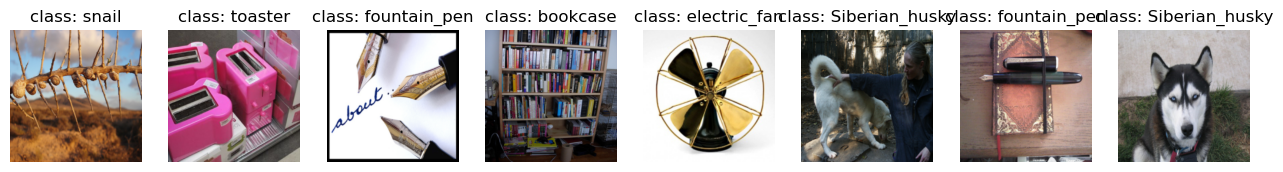

In [5]:
import os
import json
from PIL import Image

# Load annotations
with open(os.path.join(dataset_path, 'image_labels.json'), 'r') as f:
    annotations = json.load(f)

# Get labels
labels = [ann['class_name'] for image_id, ann in annotations.items()]
print('Dataset size: {}'.format(len(labels)))

# Read images
image_names = [ann['file_name'] for image_id, ann in annotations.items()]
image_paths = [os.path.join(dataset_path, 'images', image_name) for image_name in image_names]
# Convert into tensor and set up an image size
transform = v2.Compose([v2.ToImage(), v2.Resize((224, 224))])
images = [transform(Image.open(img_path).convert("RGB")).permute(1, 2, 0) for img_path in image_paths]

print('Image size: {}'.format(images[0].shape))

# Find all categories
import numpy as np
class_names = [ann['class_name'] for image_id, ann in annotations.items()]
print('Categories: {}'.format(len(np.unique(class_names))))

# Plot samples
fig, axs = plt.subplots(1, 8, figsize=(16, 2))
for i in range(8):
    axs[i].imshow(images[i])
    axs[i].set_title(f"class: {class_names[i]}")
    axs[i].axis('off')
plt.show()


As we experienced, built-in datasets provide a convenient and efficient way to access commonly used datasets for training and evaluation. They save you time for manual downloading, preprocessing, and formatting, ensuring consistency across experiments. These datasets are often optimized for **quick loading**, come with **standardized labels**, and integrate well with data pipelines.

## CPU vs. GPU

In Coding Tutorial 4, we have practiced how to use GPUs to train a model. In this section, we will do a small experiment on GPU speed compared to CPU speed, so we get an idea of how much boost GPU brings us.

Adopt the `SimpleCNN` model from Coding Tutorial 4, and we will train the model on MNIST for 3 epochs using CPU and GPU separately. How much boost do you see in the computation speed?

### CPU Computation

Make sure you are using the default CPU runtime from the menu bar: **Runtime** -> **Change runtime type** --> **CPU**

After doing so, run the following cells to see CPU computation time:


In [6]:
import time
import numpy as np

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchsummary import summary
from torchvision.transforms import v2
from torch.utils.data import DataLoader

In [8]:
device = "cpu"
print(f"Using device: {device}")

Using device: cpu


In [9]:
transform = v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=256, shuffle=True)

In [10]:
class SimpleCNN(nn.Module):
    def __init__(self, n_channels, n_classes):
        super(SimpleCNN, self).__init__()

        self.n_channels = n_channels
        self.n_classes = n_classes

        self.conv1 = nn.Conv2d(in_channels=n_channels, out_channels=32, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, n_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.sigmoid(x)
        x = self.pool2(x)
        x = self.conv2(x)
        x = torch.sigmoid(x)
        x = self.pool2(x)
        x = x.view(-1, 64 * 7 * 7)
        x = torch.sigmoid(self.fc1(x))
        x = self.fc2(x)
        return x

In [11]:
num_epochs = 3
durations = []

print("=== CPU Computing Time ===")
model = SimpleCNN(n_channels=1, n_classes=10).to(device)
loss_function = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
for epoch in range(num_epochs):
    start_time = time.time()  # Record start time
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = loss_function(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    end_time = time.time()  # Record start time
    epoch_duration = end_time - start_time  # Calculate elapsed time
    durations.append(epoch_duration)
    print(f"Epoch {epoch+1}/{num_epochs} - Time: {epoch_duration:.2f} seconds")
cpu_avg_duration = np.mean(durations)
print(f"Average duration:  {cpu_avg_duration:.2f} seconds")

=== CPU Computing Time ===
Epoch 1/3 - Time: 27.83 seconds
Epoch 2/3 - Time: 28.74 seconds
Epoch 3/3 - Time: 29.52 seconds
Average duration:  28.70 seconds


### GPU Computation

Change the runtime setting in the menu bar: **Runtime** -> **Change runtime type** --> **T4 GPU**

After doing so, run the following cells to see GPU computation time:


In [12]:
import time
import numpy as np

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchsummary import summary
from torchvision.transforms import v2
from torch.utils.data import DataLoader

In [14]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [15]:
transform = v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=256, shuffle=True)

In [16]:
class SimpleCNN(nn.Module):
    def __init__(self, n_channels, n_classes):
        super(SimpleCNN, self).__init__()

        self.n_channels = n_channels
        self.n_classes = n_classes

        self.conv1 = nn.Conv2d(in_channels=n_channels, out_channels=32, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, n_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.sigmoid(x)
        x = self.pool2(x)
        x = self.conv2(x)
        x = torch.sigmoid(x)
        x = self.pool2(x)
        x = x.view(-1, 64 * 7 * 7)
        x = torch.sigmoid(self.fc1(x))
        x = self.fc2(x)
        return x

In [17]:
num_epochs = 3
durations = []

print("=== GPU Computing Time ===")
model = SimpleCNN(n_channels=1, n_classes=10).to(device)
loss_function = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
for epoch in range(num_epochs):
    start_time = time.time()  # Record start time
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = loss_function(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    end_time = time.time()  # Record start time
    epoch_duration = end_time - start_time  # Calculate elapsed time
    durations.append(epoch_duration)
    print(f"Epoch {epoch+1}/{num_epochs} - Time: {epoch_duration:.2f} seconds")
gpu_avg_duration = np.mean(durations)
print(f"Average duration:  {gpu_avg_duration:.2f} seconds")

=== GPU Computing Time ===
Epoch 1/3 - Time: 11.03 seconds
Epoch 2/3 - Time: 10.77 seconds
Epoch 3/3 - Time: 10.51 seconds
Average duration:  10.77 seconds


As we can see from the comparison, using a GPU significantly accelerates computation. This speedup is crucial for engineers, as it allows for faster model training, shorter experimentation cycles, and improved productivity. By leveraging GPU acceleration, deep learning models can be trained on large datasets more efficiently, enabling quicker iterations and better optimization.

## GPU Computing Resource for CSCI 5922 SP25

To support your learning, we have secured GPU computing resources for you for this semester. We encourage everyone to make full use of these resources!

Before starting, below are the suggestions on how to pick your computing resource:
- **Colab free CPU/GPU**: If you are more comfortable with using Colab, we suggest you to stick with Colab if you are running **small models** on **small datasets**.
- **Google Cloud GPU(s)**: If you are more comfortable with using Colab, we suggest you to make use of the Google Cloud resource for running **larger models** on **larger datasets**.
- **Jetstream2**: You can leverage the Jetstream2 JupyterLab to access GPUs by running Python notebooks (`.ipynb`) or Python scripts (`.py`).  (You will not be able to use these GPUs on the Google Colab platform.)

### Google Cloud Credits

[**Google Cloud Tutorial**](https://docs.google.com/document/d/1lYzmwGHs0E_TpXSxbOZTXUEWc5FhJCeYeQ3XwCs_7eE/edit?usp=sharing)

Everyone in the course CSCI 5922 is awarded \$50 credits on Google Cloud. Google Cloud virtual machines can be eqquiped with various GPU types at different prices. You are able to leverage the awarded \$50 credits and connect the Google Cloud virtual machines to your Colab notebooks.

If you are ready to claim the credits and start using the Google Cloud GPUs, read this [tutorial](https://docs.google.com/document/d/1lYzmwGHs0E_TpXSxbOZTXUEWc5FhJCeYeQ3XwCs_7eE/edit?usp=sharing).

### JetStream2

[**Jetstream2 Tutorial**](https://docs.google.com/document/d/1Uox7NWL8N7Nj3XGDamUtegLSeANHF4G9BDnU6FTScok/edit?usp=sharing)


The Jetstream2 virtual machines, provided by our awarded NSF ACCESS grant, are equipped with A100 GPUs.  These advanced GPUs are a shared resource by everyone in this course, and our credit **can** run out, so we ask everyone to make a collective effort to maintain the efficiency of resource usage. When using Jetstream2, we ask you to only access your own files and data. However, we are unable to prevent violation of this rule. Therefore, you are responsible for your own data safety.

This resource is sign-up based for a weekly rotation. If you are ready to sign up for Jetstream2, read this [tutorial](https://docs.google.com/document/d/1Uox7NWL8N7Nj3XGDamUtegLSeANHF4G9BDnU6FTScok/edit?usp=sharing).


## Review

To familiarize yourself with the built-in datasets in PyTorch, try to load some of the datasets in `torchvision` as well as load your own data.

We also encourage you to spend some time exploring the Google Cloud computing resources available to you. If you are interested in signing up for the first rotation of Jetstream2, don't forget to submit the request form!

For any questions and discussions regarding this tutorial, attend [TA office hours](https://docs.google.com/spreadsheets/d/1fzfTJpEF7RaUYRA_NGa3DkiazdQXVj7QNBbp6DrEZ3I/edit?usp=sharing) or create a post on [Piazza](https://piazza.com/colorado/spring2025/csci5922/home) :) See you in the next tutorial!

\- Everley